<h1> This notebook contains code for getting metrics on the predictions from batch-transform.

In [1]:
import pandas as pd
df = pd.read_csv('results.csv')

In [2]:
comparison = df.iloc[:, [1,2]].values

In [3]:
df.head()

Image_path  ground_truth_label  \
0  nsfw_dataset_test/animated/(m=e-yaaGqaa)(mh=SW...                   0   
1  nsfw_dataset_test/animated/(m=e-yaaGqaa)(mh=-z...                   0   
2  nsfw_dataset_test/animated/(m=e-yaaGqaa)(mh=4Q...                   0   
3             nsfw_dataset_test/animated/ouwo5EE.jpg                   0   
4  nsfw_dataset_test/animated/(m=e-yaaGqaa)(mh=Sx...                   0   

   Predicted  
0          0  
1          0  
2          0  
3          0  
4          0

**The code below gets confusion matrix from the csv file.**

In [3]:
import numpy as np
samples = comparison.shape[0]
conf_matrix = np.zeros( (5, 5) , dtype=np.int32 )

for i in range(samples):
    conf_matrix[ int(comparison[i][0]) ][ int(comparison[i][1])  ] += 1

print(conf_matrix)

[[1901    2   28    7   45]
 [  13  494  755   11  186]
 [ 137   38 3492    7  473]
 [ 155   23   53  806   55]
 [  10    5   27    0 2413]]


**plotting the confusion matrix**

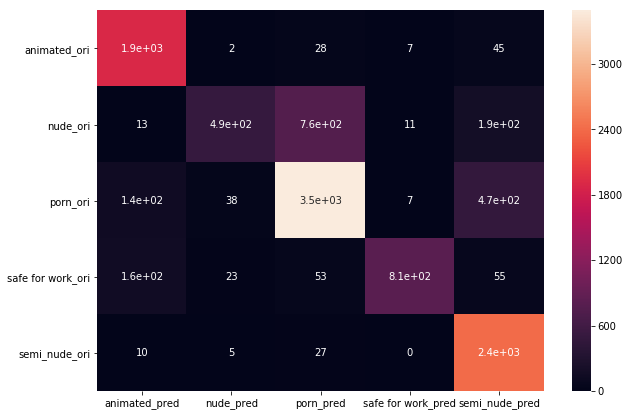

In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_cm = pd.DataFrame(conf_matrix, index = ['animated_ori' , 'nude_ori' , 'porn_ori' , 'safe for work_ori' , 'semi_nude_ori'],
                  columns = ['animated_pred' , 'nude_pred' , 'porn_pred' , 'safe for work_pred' , 'semi_nude_pred'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

**code that gets metrics for single class**

In [5]:

def get_metrics_for_single_class(class_label, conf_matrix):
    tn = 0
    for i in range(5):
        for j in range(5):
            if i != class_label or j != class_label:
                tn += conf_matrix[i][j]


    tp = conf_matrix[class_label][class_label]

    fp = np.sum(conf_matrix[class_label][:]  ) - conf_matrix[class_label][class_label] 
    fn =  np.sum(conf_matrix[:][class_label] ) -conf_matrix[class_label][class_label]

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1_score = (precision*recall)/ (precision+recall)
    
    return accuracy , precision , recall , f1_score 


**We will calculate scores for classes one by one . Notice the names of classes are given in alphabetic order ie.**
1. Animated (label 0)
2. Nude (label 1)
3. Porn (label 2)
4. Safe For Work (label 3)
5. Semi Nude (label 4)

<h4> For animated

In [6]:
acc , pre , rec , f1 = get_metrics_for_single_class(0,conf_matrix)
print(acc ,pre, rec , f1)

0.9854867256637169 0.9586485123550177 0.9586485123550177 0.47932425617750885


<h4> For Nude

In [7]:
acc , pre , rec , f1 = get_metrics_for_single_class(1,conf_matrix)
print(acc ,pre, rec , f1)

0.8522883820603092 0.33858807402330365 0.33858807402330365 0.16929403701165183


<h4> For Porn

In [8]:
acc , pre , rec , f1 = get_metrics_for_single_class(2,conf_matrix)
print(acc ,pre, rec , f1)

0.894745299694681 0.8420544972269111 0.8420544972269111 0.42102724861345553


<h4> For Safe For Work

In [9]:
acc , pre , rec , f1 = get_metrics_for_single_class(3,conf_matrix)
print(acc ,pre, rec , f1)

0.9511445165698668 0.7380952380952381 0.7380952380952381 0.36904761904761907


<h4> For Semi - Nude

In [10]:
acc , pre , rec , f1 = get_metrics_for_single_class(4,conf_matrix)
print(acc ,pre, rec , f1)

0.9925133689839573 0.9828920570264765 0.9828920570264765 0.49144602851323826


<h4>The code below gets metrics for all nsfw classes 

In [11]:
def get_metrics_for_nsfw():
    safe_for_work_label = 3
    tp = 0
    for i in range(5):
        for j in range(5):
            if i != safe_for_work_label or j != safe_for_work_label:
                tp += conf_matrix[i][j]


    tn = conf_matrix[3][3]

    fn = conf_matrix[3][0] + conf_matrix[3][1]  + conf_matrix[3][2] + conf_matrix[3][4]  
    fp = conf_matrix[2][3] + conf_matrix[1][3]  + conf_matrix[0][3] + conf_matrix[4][3] 

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1_score = (precision*recall)/ (precision+recall)
    return accuracy , precision , recall , f1_score


In [12]:
acc , pre , rec , f1 = get_metrics_for_nsfw()
print(acc ,pre, rec , f1)

0.9728313095134097 0.9975857073877354 0.9730595327807083 0.49258499833102853
